# Load Important Libraries


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import gc; gc.enable()
import lightgbm as lgb
from sklearn.model_selection import ShuffleSplit
from sklearn import *

In [2]:
!pip install lightgbm

In [3]:
df_members = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\members.csv\members.csv", dtype = {'msno':'category','city':np.uint8,'bd':np.uint8, 'gender':'category'})
sample_sub = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\sample_submission.csv\sample_submission.csv")
df_songs_extra_info = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\song_extra_info.csv\song_extra_info.csv",dtype = {'song_id':'category', 'name':'category',
                                                                        'isrc':'category'})
df_songs = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\songs.csv\songs.csv", dtype = {'song_id':'category','genre_ids':'category',
                                                      'artist_name':'category','composer':'category',
                                                     'lyricist':'category', 'language':'category'})
df_test = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\test.csv\test.csv", dtype = {'msno':'category', 'song_id':'category',
                                                   'source_system_tab':'category',
                                                     'source_screen_name':'category',
                                                    'source_type':'category'})
df_train = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\train.csv\train.csv",dtype = {'msno':'category', 'song_id':'category',
                                                    'source_system_tab':'category',
                                                     'source_screen_name':'category',
                                                    'source_type':'category'})

In [4]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [5]:
sample_sub.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [6]:
df_songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [8]:
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [9]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [10]:
selection = pd.DataFrame({'Data':['df_members','sample_sub','df_songs_extra_info','df_songs','df_test','df_train'],
                          ('rows','columns'):[df_members.shape,sample_sub.shape,df_songs_extra_info.shape,df_songs.shape,df_test.shape,df_train.shape]})
selection.sort_values(by='Data',ascending=False)

,Data,"(rows, columns)"
1,sample_sub,"(2556790, 2)"
5,df_train,"(7377418, 6)"
4,df_test,"(2556790, 6)"
2,df_songs_extra_info,"(2295971, 3)"
3,df_songs,"(2296320, 7)"
0,df_members,"(34403, 7)"


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   song_id             category
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              int64   
dtypes: category(5), int64(1)
memory usage: 131.7 MB


In [12]:
# Merging Data Sets
df_train_members = pd.merge(left=df_train, right = df_members, how = 'left', on = ['msno'])
df_train_members.head()
df_train_members.dtypes

msno                        object
song_id                   category
source_system_tab         category
source_screen_name        category
source_type               category
target                       int64
city                         uint8
bd                           uint8
gender                    category
registered_via               int64
registration_init_time       int64
expiration_date              int64
dtype: object

In [13]:
del df_train ,df_members; gc.collect();

In [14]:
# Merging the Data Sets
df_songs_songs_extra_info = pd.merge(left = df_songs, right = df_songs_extra_info, how = 'left', on = 'song_id')
df_songs_songs_extra_info.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,PLAYING WITH FIRE,NaN
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,SORRY| SORRY,NaN
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,愛我的資格,TWC950206108
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,Mary Had a Little Lamb,NaN


In [15]:
del df_songs, df_songs_extra_info; gc.collect();

In [16]:
df_train_final = pd.merge(left= df_train_members, right = df_songs_songs_extra_info, how = 'left', on = ['song_id'])
df_train_final.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [17]:
#train_final.dtypes
for col in ['msno', 'song_id']:
    df_train_final[col]= df_train_final[col].astype('category')
df_train_final.dtypes

msno                      category
song_id                   category
source_system_tab         category
source_screen_name        category
source_type               category
target                       int64
city                         uint8
bd                           uint8
gender                    category
registered_via               int64
registration_init_time       int64
expiration_date              int64
song_length                float64
genre_ids                 category
artist_name               category
composer                  category
lyricist                  category
language                  category
name                      category
isrc                      category
dtype: object

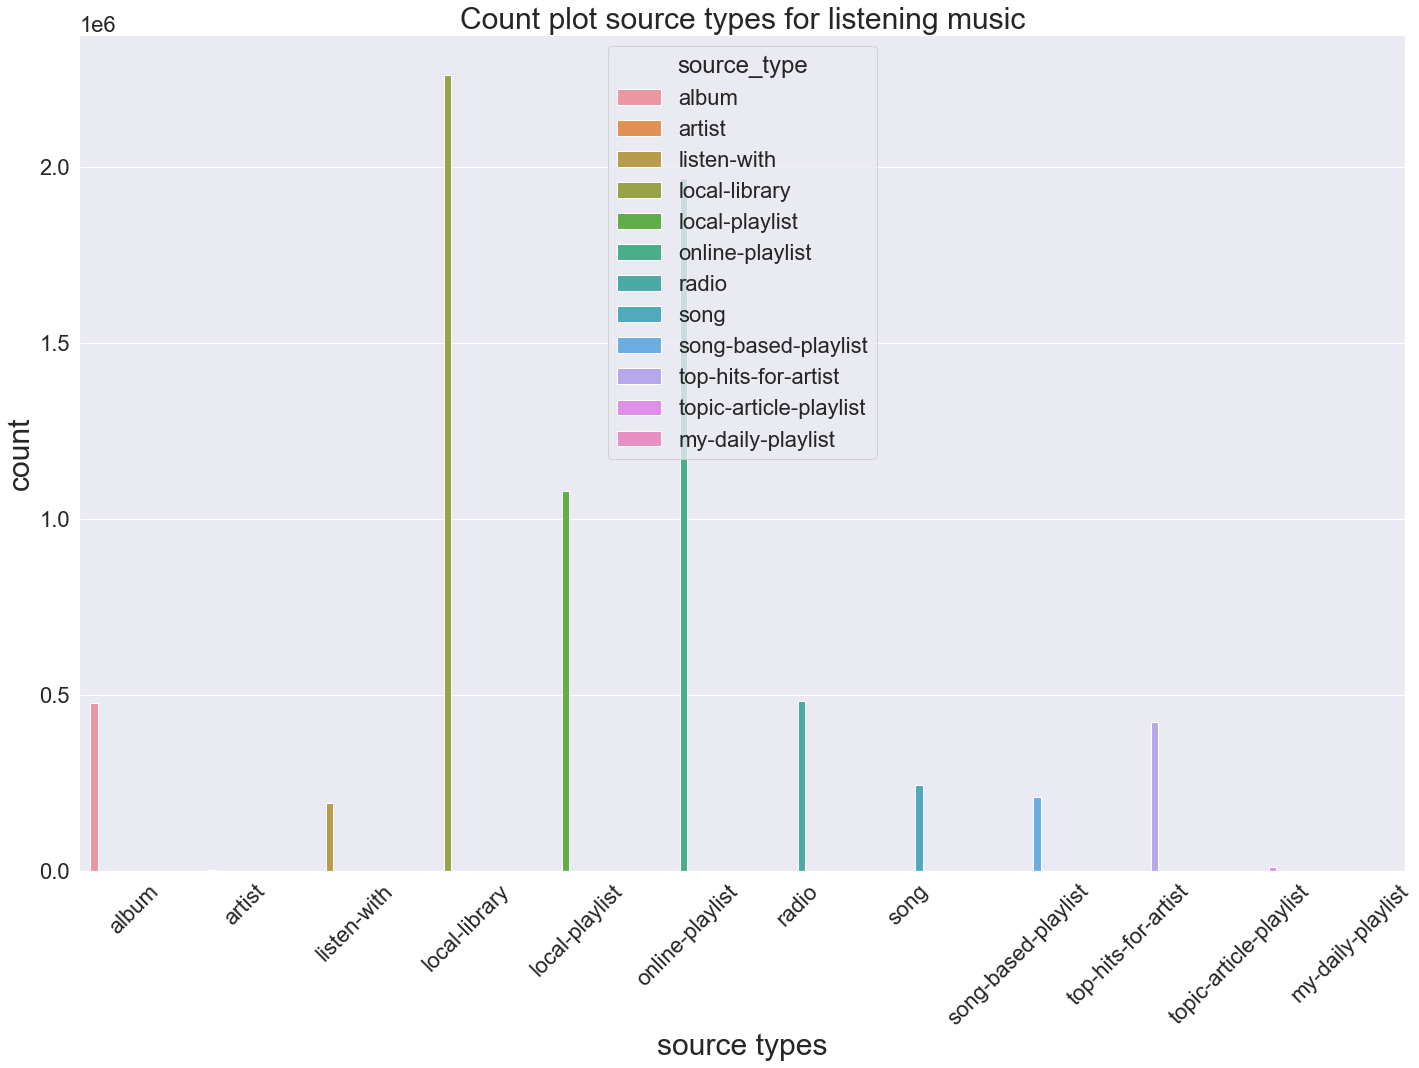

In [18]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=df_train_members)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

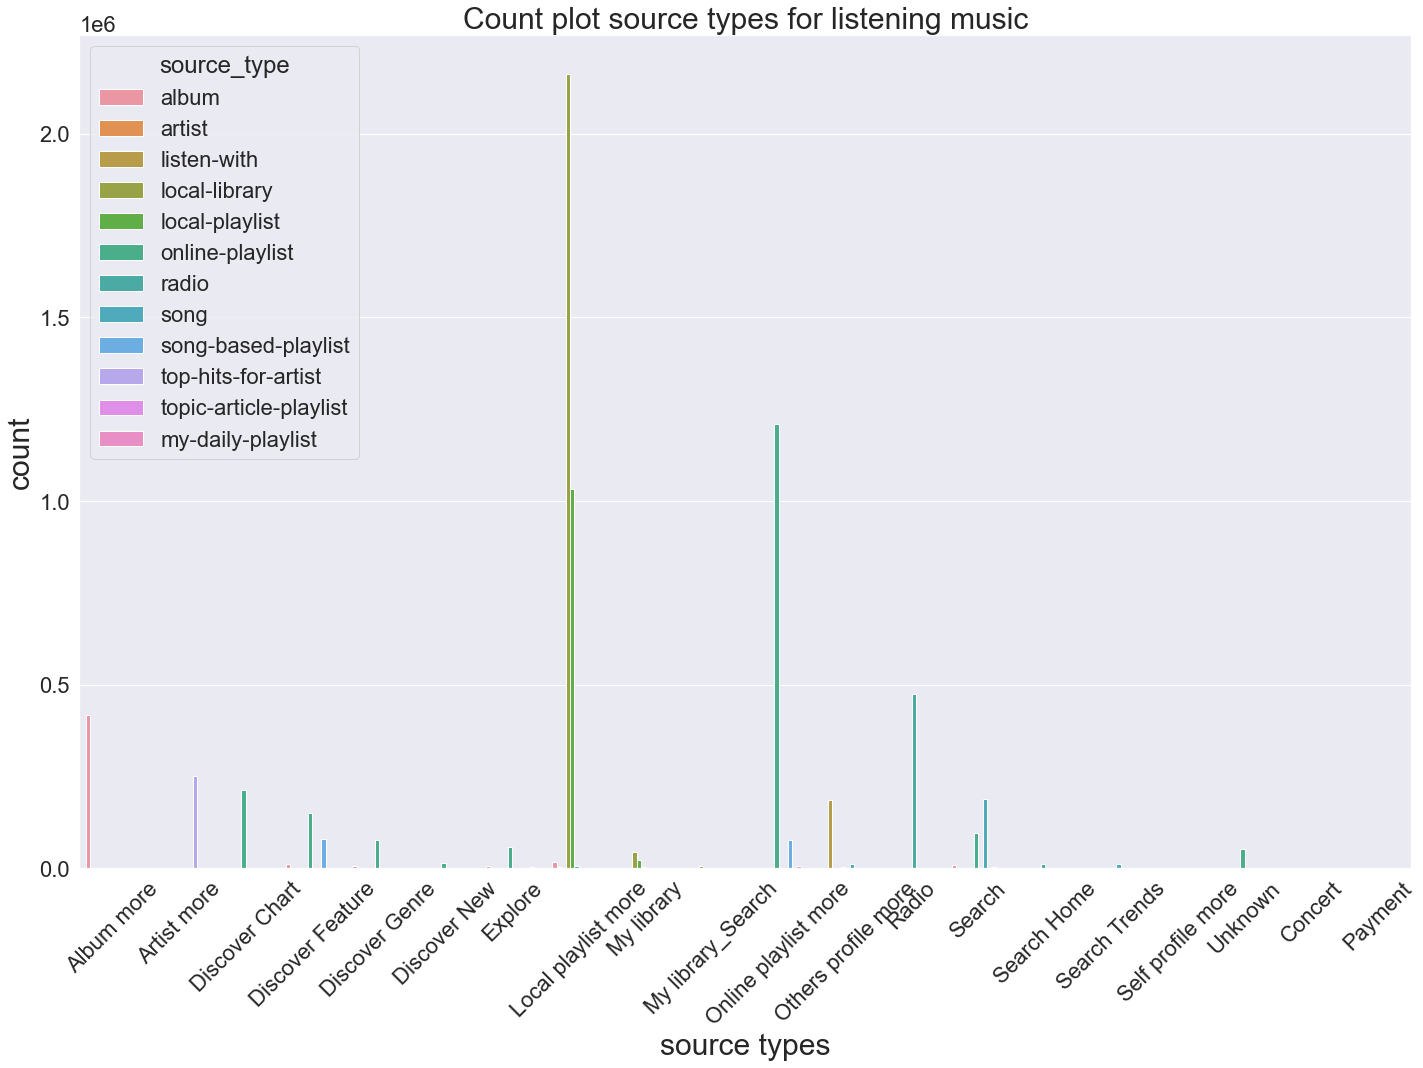

In [19]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_screen_name',hue='source_type',data=df_train_members)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=30)
plt.tight_layout()

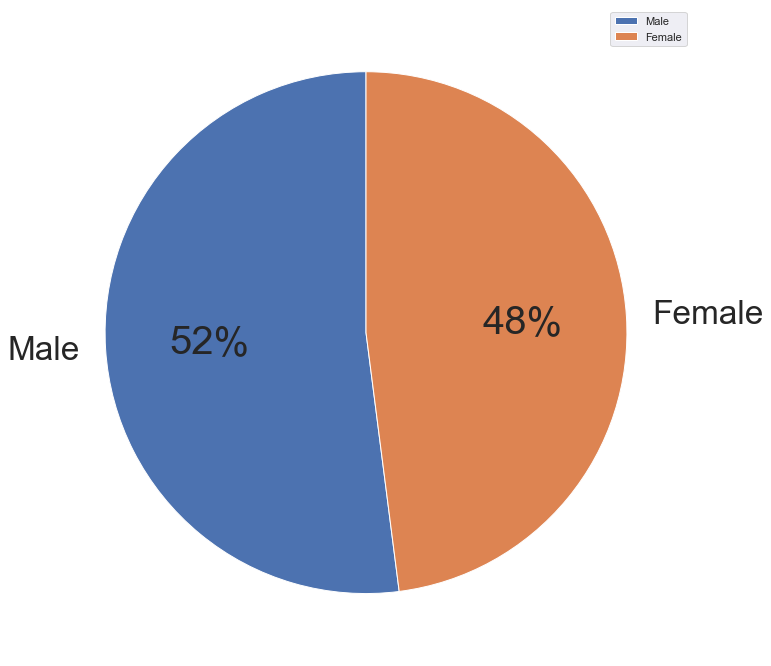

In [20]:
plt.rcParams['font.size'] = 40.0
labels = ['Male','Female']
plt.figure(figsize = (12, 12))
sizes = pd.value_counts(df_train_members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [21]:
del df_train_members, df_songs_songs_extra_info; gc.collect();

In [22]:
# training the dataset
model = None 
for train_indices,val_indices in ShuffleSplit(n_splits=1,test_size = 0.2,train_size=0.8).split(df_train_final): 
    train_data = lgb.Dataset(df_train_final.drop(['song_id','target'],axis=1).loc[train_indices,:],label=df_train_final.loc[train_indices,'target'])
    val_data = lgb.Dataset(df_train_final.drop(['song_id','target'],axis=1).loc[val_indices,:],label=df_train_final.loc[val_indices,'target'])
    
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting': 'gbdt',
        'learning_rate': 0.05 , 
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 128,
        'max_depth': 10,
        'num_rounds': 200,
        } 
    
    model = lgb.train(params, train_data, 200, valid_sets=[val_data])

C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.176897 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's auc: 0.676035
[2]	valid_0's auc: 0.685395
[3]	valid_0's auc: 0.687074
[4]	valid_0's auc: 0.69067
[5]	valid_0's auc: 0.696138
[6]	valid_0's auc: 0.700356
[7]	valid_0's auc: 0.701295
[8]	valid_0's auc: 0.702253
[9]	valid_0's auc: 0.70397
[10]	valid_0's auc: 0.706036
[11]	valid_0's auc: 0.707179
[12]	valid_0's auc: 0.708795
[13]	valid_0's auc: 0.709826
[14]	valid_0's auc: 0.710723
[15]	valid_0's auc: 0.712798
[16]	valid_0's auc: 0.714243
[17]	valid_0's auc: 0.715072
[18]	valid_0's auc: 0.715956
[19]	valid_0's auc: 0.716457
[20]	valid_0's auc: 0.716751
[21]	valid_0's auc: 0.717088
[22]	valid_0's auc: 0.718247
[23]	valid_0's auc: 0.719185
[24]	valid_0's auc: 0.720035
[25]	valid_0's auc: 0.720817
[26]	valid_0's auc: 0.721003
[27]	valid_0's auc: 0.721452
[28]	valid_0's auc: 0.722034
[29]	valid_0's auc: 0.72252
[30]	valid_0's auc: 0.723026
[31]	valid_0's auc: 0.723524
[32]	valid_0's auc: 0.724069
[33]	valid_0's auc: 0.724642
[34]	valid_0's auc: 0.725671
[35]	valid_0's auc: 0.7259

In [23]:
# for testing set :-
df_members = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\members.csv\members.csv",dtype = {'msno':'category','city':np.uint8,'bd':np.uint8, 'gender':'category'})
#df_members.head()

df_songs = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\songs.csv\songs.csv", dtype = {'song_id':'category','genre_ids':'category',
                                                      'artist_name':'category','composer':'category',
                                                     'lyricist':'category', 'language':'category'})
#df_songs.head()
df_song_extra_info = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\song_extra_info.csv\song_extra_info.csv",dtype = {'song_id':'category', 'name':'category',
                                                                        'isrc':'category'})
#df_song_extra_info.head()
df_test = pd.read_csv(r"C:\Users\DELL\Desktop\kkbox-music-recommendation-challenge\test.csv\test.csv", dtype = {'msno':'category', 'song_id':'category',
                                                   'source_system_tab':'category',
                                                     'source_screen_name':'category',
                                                    'source_type':'category'})
#df_test.head()
# merging data sets
df_test_members = pd.merge(left=df_test, right = df_members, how = 'left', on = ['msno'])
df_test_members.head()
df_test_members.dtypes

del df_test, df_members; gc.collect();

# merging the data sets
df_songs_songs_extra_info = pd.merge(left = df_songs, right = df_song_extra_info, how = 'left', on = 'song_id')
df_songs_songs_extra_info.head()

del df_songs, df_song_extra_info; gc.collect();

df_test_final = pd.merge(left=df_test_members, right = df_songs_songs_extra_info, how = 'left', on = ['song_id'])
df_test_final.head()

#converting object data types into categorical 
for col in ['msno', 'song_id']:
    df_test_final[col]= df_test_final[col].astype('category')
df_test_final.dtypes

del df_test_members, df_songs_songs_extra_info; gc.collect();

# using test dataset

predictions = model.predict(df_test_final.drop(['song_id'],axis=1), predict_disable_shape_check=True)
df_test_final['target'] = predictions
df_test_final.drop(['msno','song_id','source_system_tab','source_screen_name', 'source_type', 'city','bd','gender',
                    'registered_via','registration_init_time','expiration_date','song_length','genre_ids',
                    'artist_name','composer','lyricist', 'language', 'name', 'isrc'],axis=1,inplace=True)
df_test_final.to_csv('submissions.csv',index=False)


In [24]:
output = pd.read_csv('submissions.csv')
output.head()

,id,target
0,0,0.169610
1,1,0.168148
2,2,0.196466
3,3,0.193797
4,4,0.193797
